@author: Octavio Gutiérrez de Código Máquina 

URL del canal: https://www.youtube.com/CodigoMaquina 

URL del video: https://youtu.be/cXLOZqWg01k

# Sobreajuste y Subajuste
# K-vecinos más cercanos (KNN) 

## Visualización y Preprocesamiento de Datos  

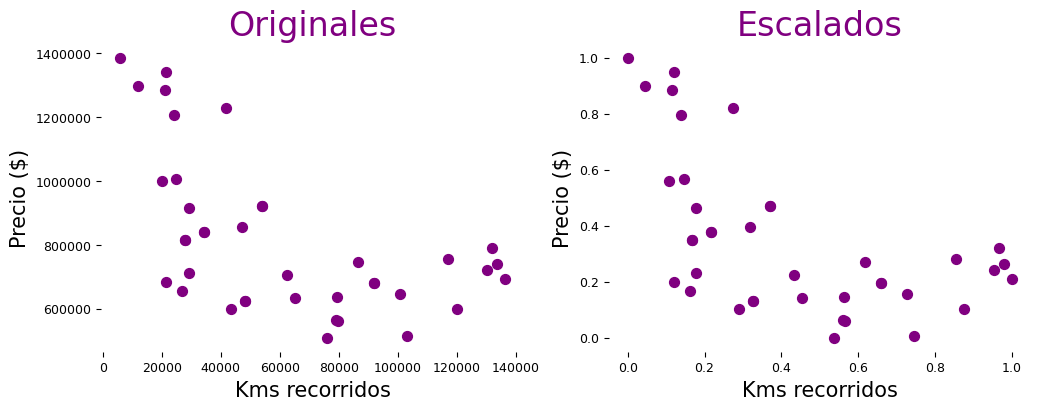

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor

# Cargar datos 
carros = pd.read_csv("carros.csv")

# Detalles de visualización
plt.rcParams["font.size"] = 9
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.bottom"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.left"] = False

# Graficar datos crudos: kms vs precio
fig = plt.figure(figsize=(12, 4))

ax = fig.add_subplot(1, 2, 1)

ax.scatter(carros["kms"], carros["precio"], c="purple", s=50)

ax.set_title("Originales", size=24, color="purple")
ax.set_ylabel("Precio ($)", size=15)
ax.set_xlabel("Kms recorridos", size=15)
ax.ticklabel_format(style="plain")

# Escalamiento de los datos 
escala_kms = preprocessing.MinMaxScaler()
escala_precio = preprocessing.MinMaxScaler()
kms = escala_kms.fit_transform(carros["kms"].values.reshape(-1, 1))
precio = escala_precio.fit_transform(carros["precio"].values.reshape(-1, 1))

# Graficar datos escalados: kms vs precio
ax = fig.add_subplot(1, 2, 2)

ax.scatter(kms, precio, c="purple", s=50)

ax.set_title("Escalados", size=24, color="purple")
ax.set_ylabel("Precio ($)", size=15)
ax.set_xlabel("Kms recorridos", size=15)
ax.ticklabel_format(style="plain")

plt.show()

## Modelos con diferentes valores de K (vecinos)

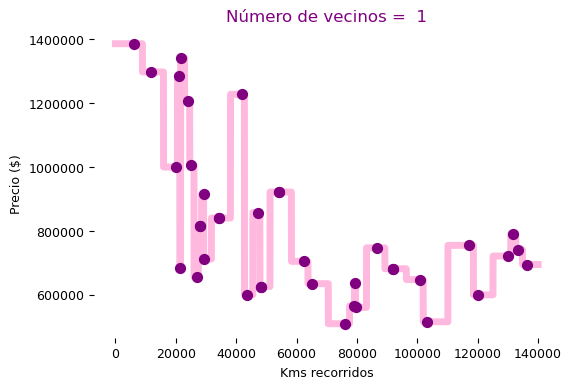

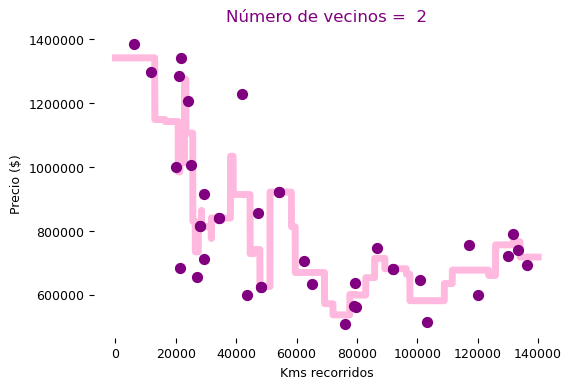

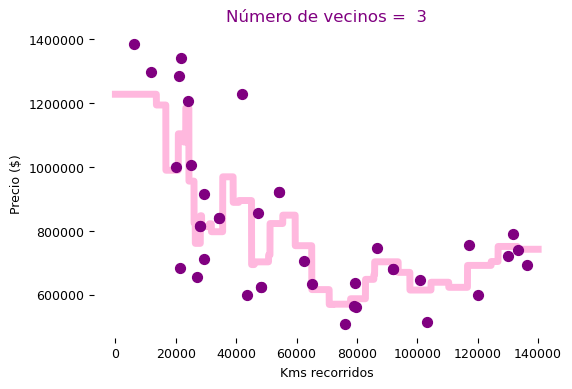

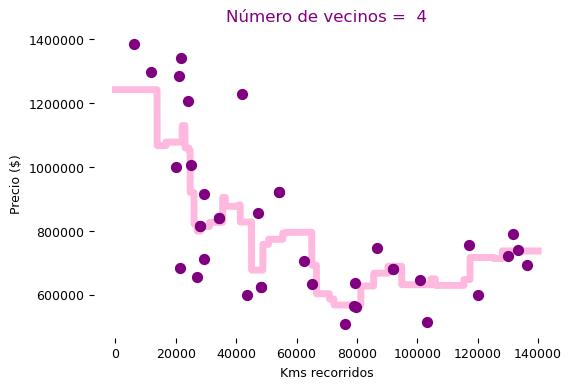

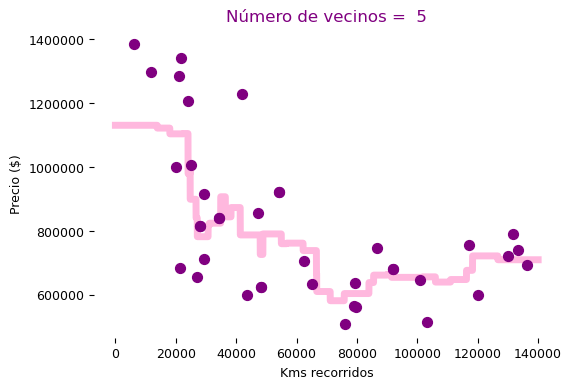

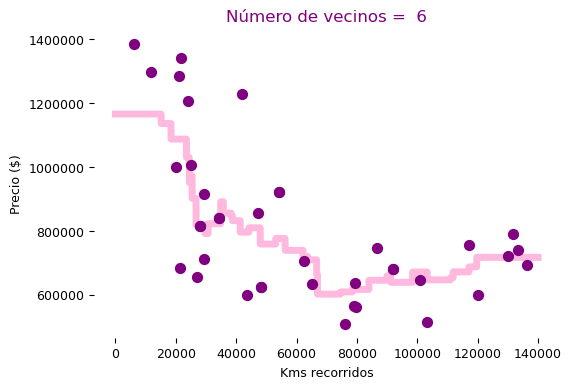

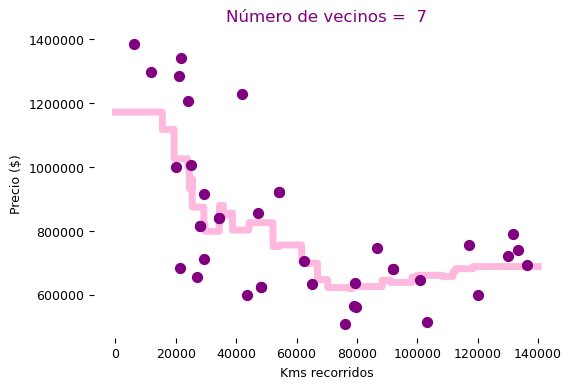

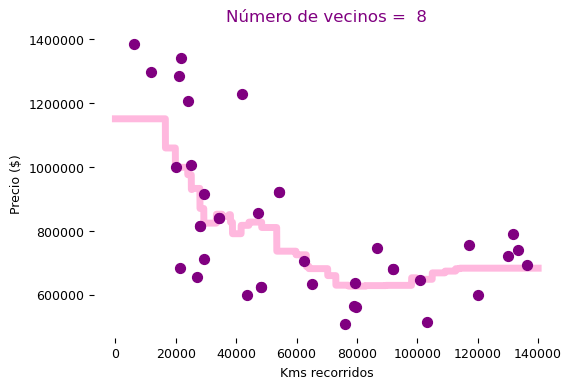

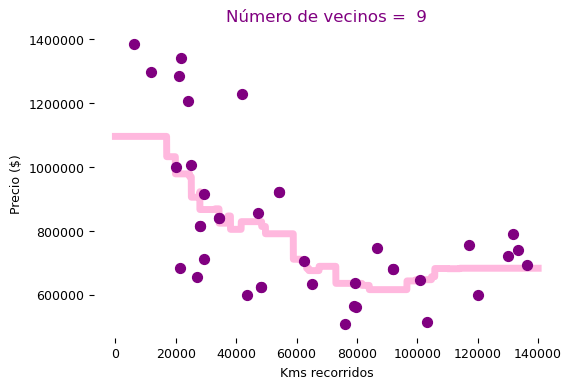

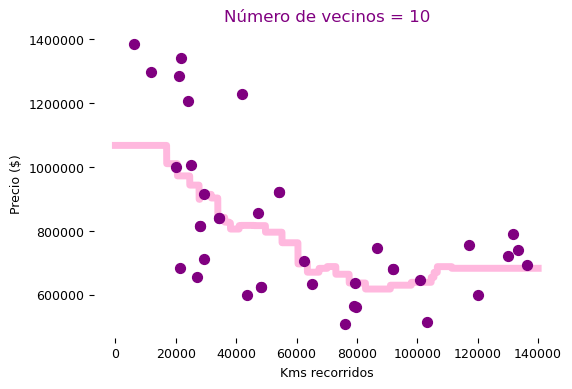

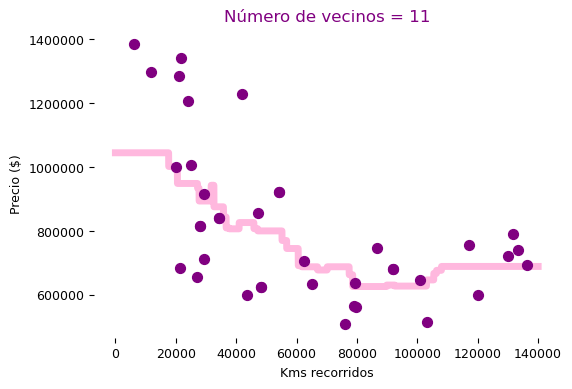

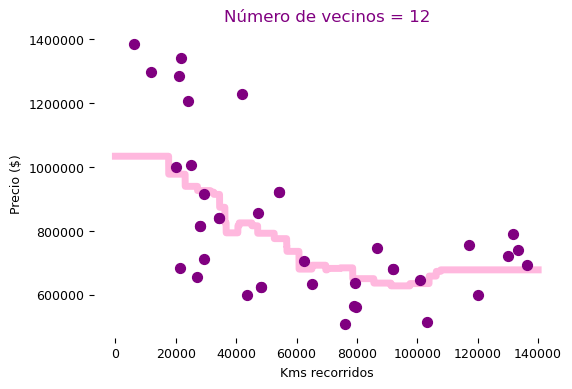

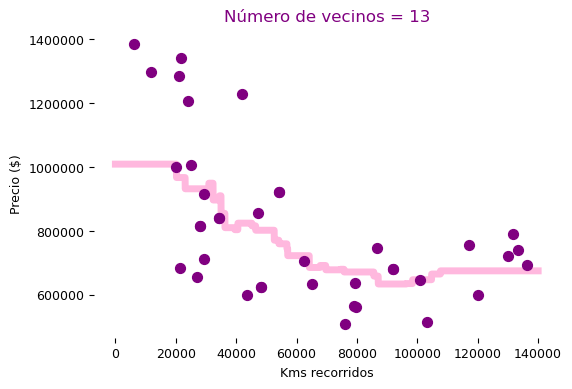

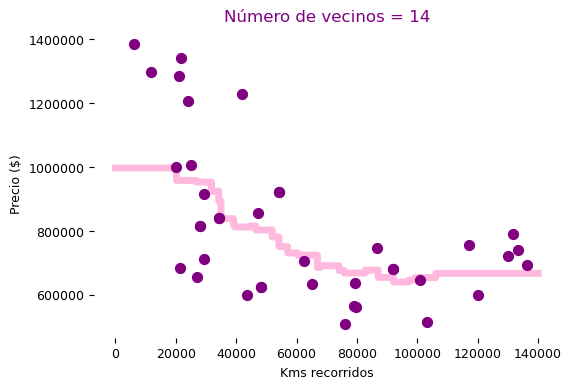

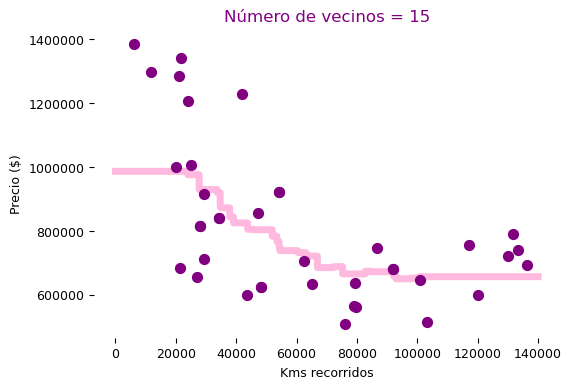

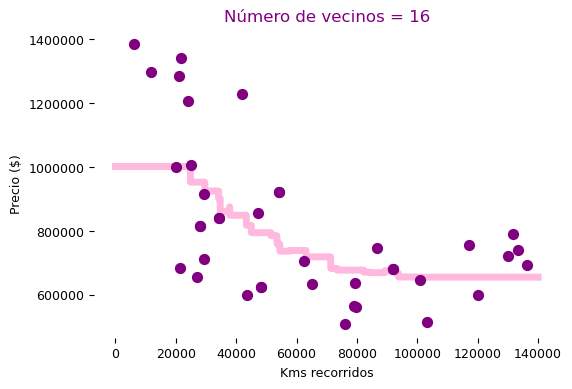

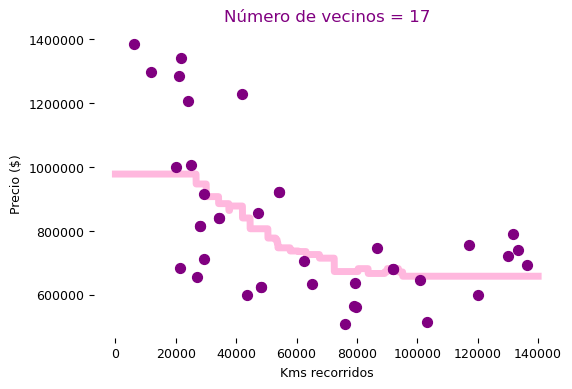

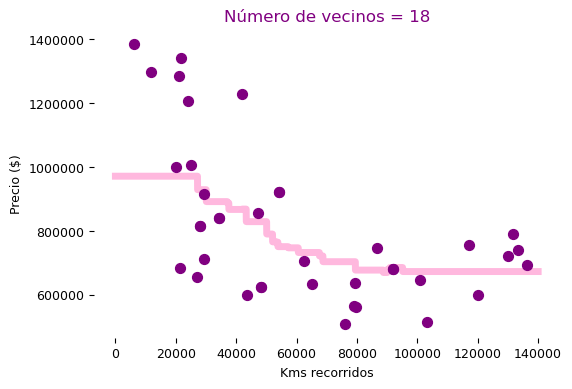

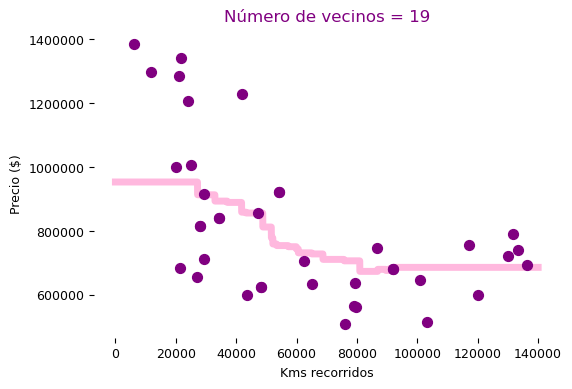

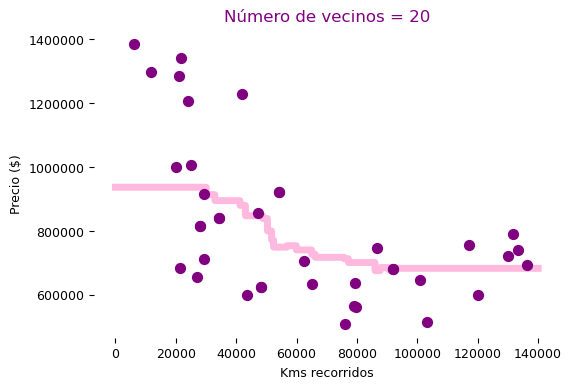

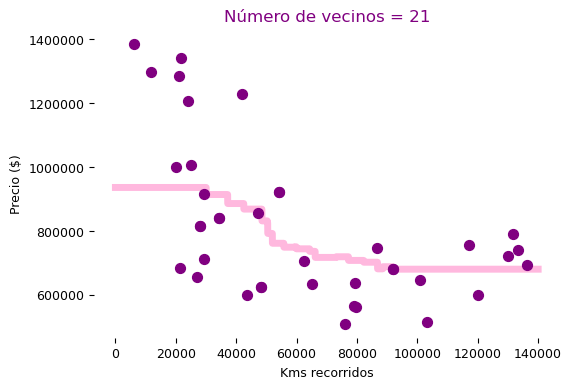

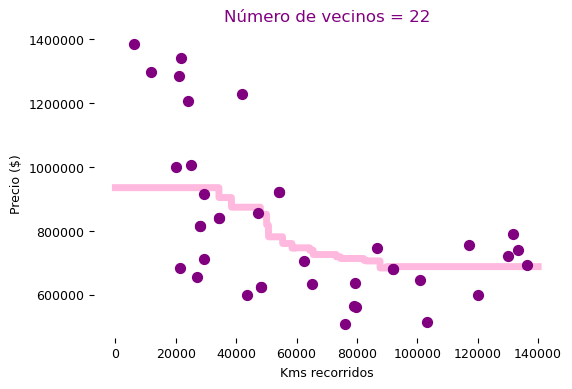

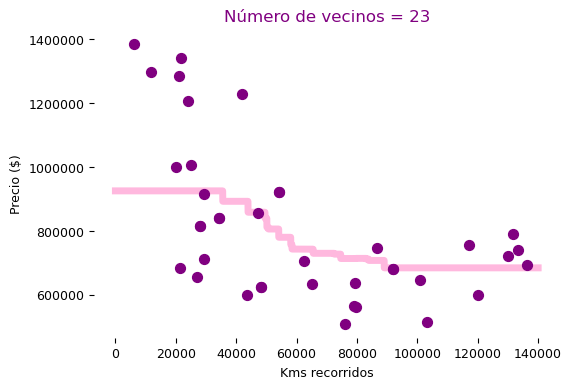

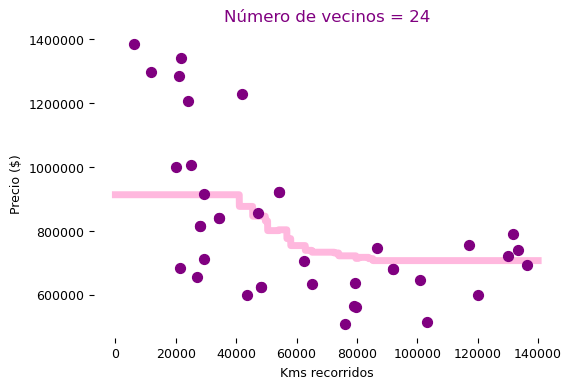

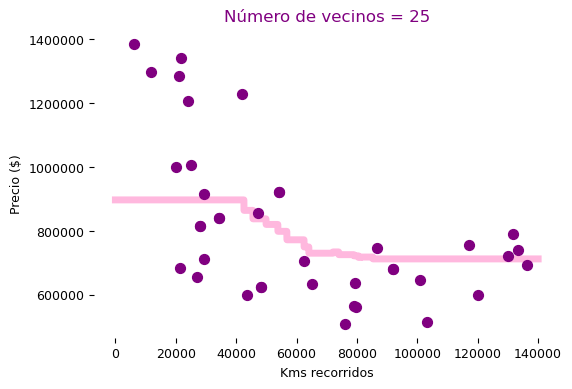

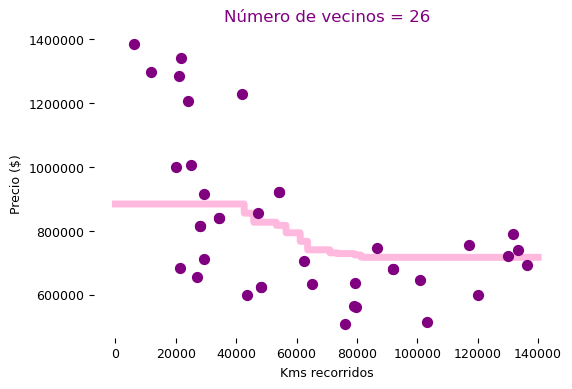

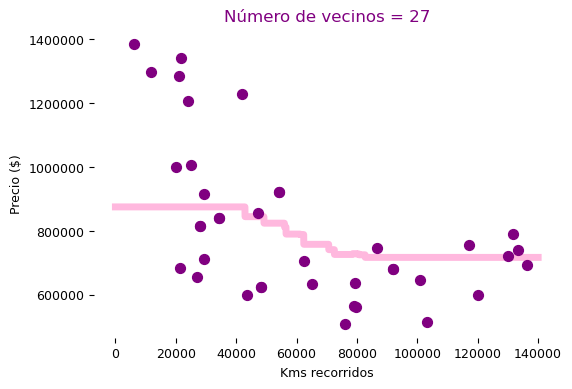

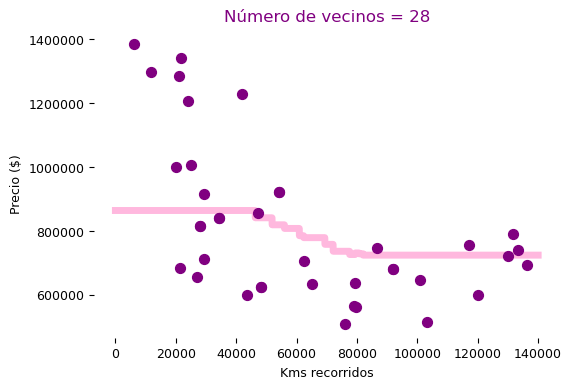

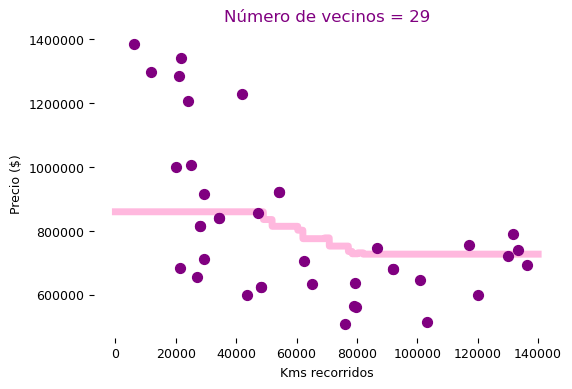

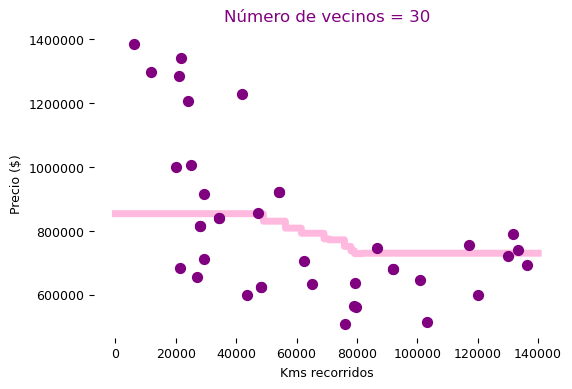

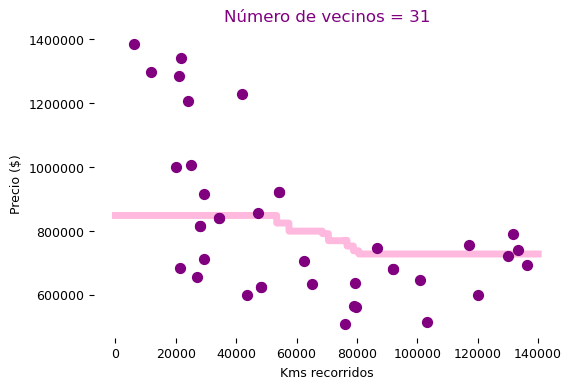

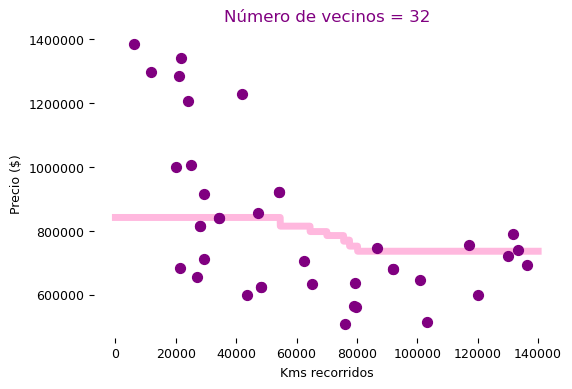

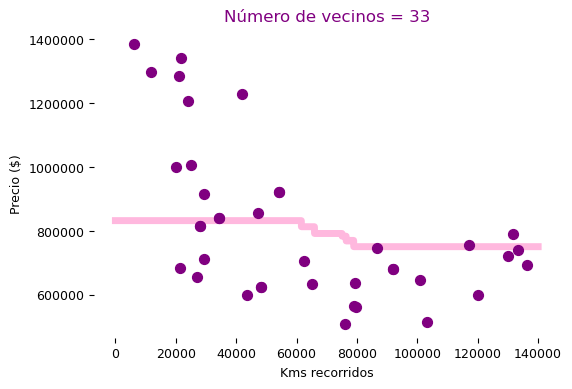

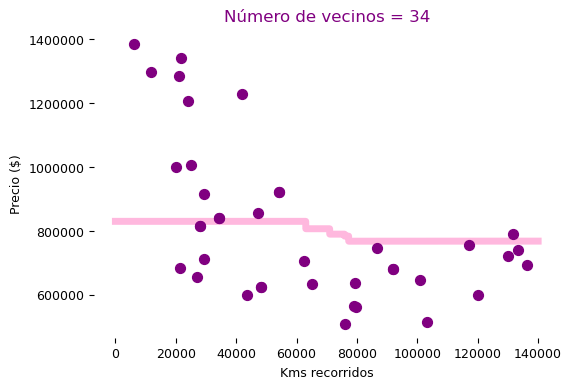

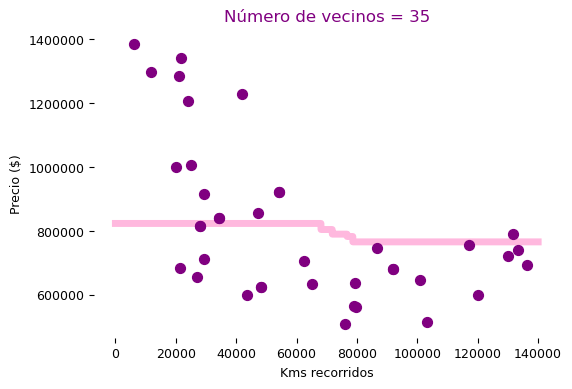

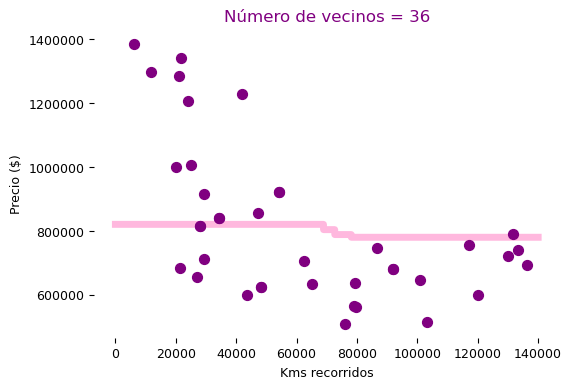

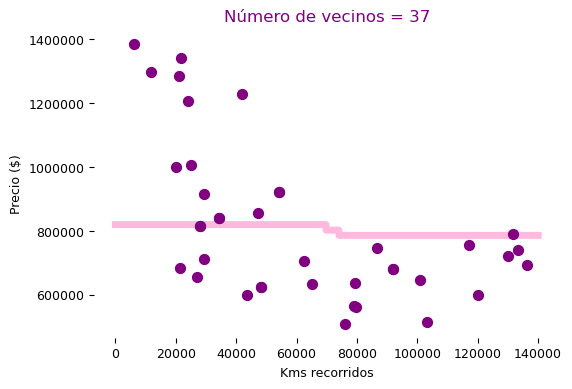

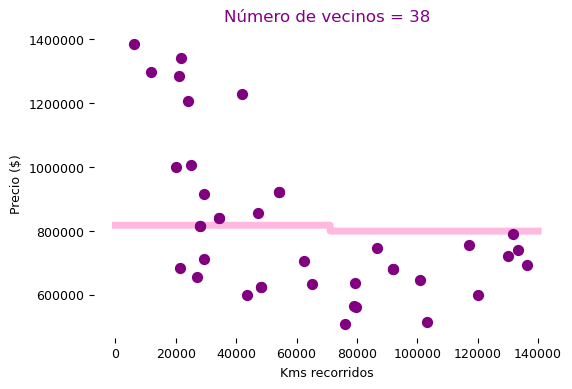

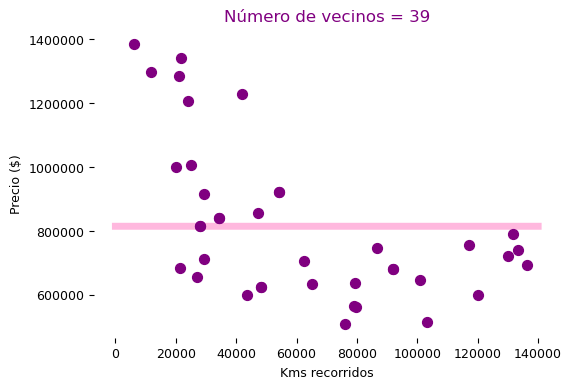

In [2]:
max_num_vecinos = len(kms)

for num_vecinos in range(1, max_num_vecinos + 1):

    # Creación del modelo regresoo knn para un número de vecinos dado 
    knn = KNeighborsRegressor(n_neighbors=num_vecinos)
    knn.fit(kms, precio)

    # Múltiples regresiones de los valores dentro del rango
    kms_instancias = escala_kms.transform(np.arange(140000).reshape(-1, 1))
    precio_instancias = knn.predict(kms_instancias)
    todas = escala_precio.inverse_transform(precio_instancias)
    todas = todas.reshape(1, -1)

    # Graficar los resultados de las múltiples regresiones
    fig = plt.figure(figsize=(6, 4))

    plt.scatter(carros["kms"], carros["precio"], c="purple", s=50)

    plt.plot(np.arange(140000), todas.reshape(1, -1)[0], 
             linewidth=5, color="deeppink", alpha=0.3, zorder=0)

    plt.ylabel("Precio ($)")
    plt.xlabel("Kms recorridos")
    plt.title("Número de vecinos = %2d" % num_vecinos, size=12, color="purple")
    plt.ticklabel_format(style="plain")
    plt.show()